# **Underfitting:**


Underfitting occurs when a machine learning model is too simplistic and fails to capture the underlying patterns in the data, resulting in poor performance on both the training and test datasets.

**Causes of Underfitting:**

Model Complexity: Using a basic or low-complexity model that cannot represent the data's complexity.

Insufficient Training: Inadequate training data or training for too few epochs.

Limited Features: Missing critical features or information necessary for learning.

Over-regularization: Excessive use of regularization techniques can hinder the model's learning capacity.

Data Noise: High levels of noise in the data can mislead the model.

Imbalanced Data: Uneven class distribution in classification problems can lead to biased predictions.

Wrong Model Selection: Using an inappropriate model for the task at hand.

Limited Training Size: Insufficient diversity and representation in the training data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset:
data=pd.read_csv('/content/drive/MyDrive/practise/housing.csv')

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#understanding the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='MEDV', ylabel='Count'>

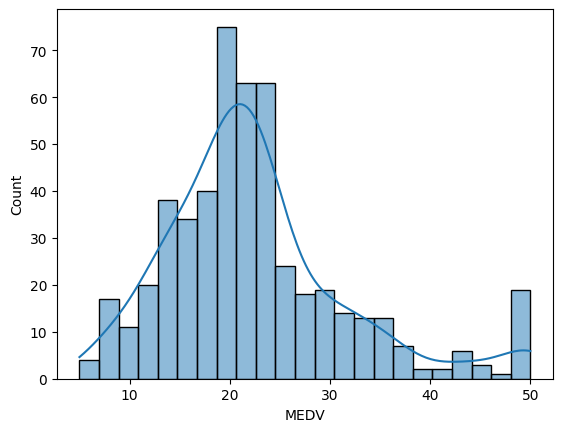

In [ ]:
#Observing the distribution of the target variable
import seaborn as sns
sns.histplot(data['MEDV'],kde=True)

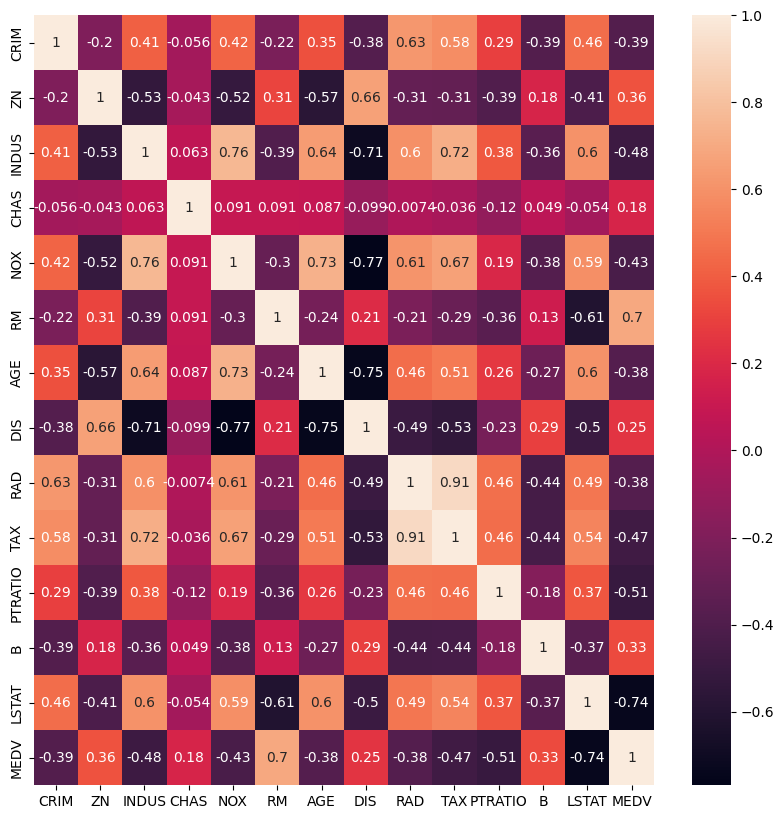

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

### **Observations:**
1. The data is right skewed.
2. Outliers are present.

### Let us build a model for the above dataset without removing any outliers.

In [ ]:
data.dropna(inplace=True)

In [ ]:
#Let us now split the data to build our model
X=data[['DIS','B','PTRATIO']]
y=data['MEDV']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [ ]:
model=LinearRegression()#building the model

In [ ]:
model.fit(X_train,y_train)#training the model

LinearRegression()

In [ ]:
train_pred=model.predict(X_train)

In [ ]:
train_accuracy=r2_score(y_train,train_pred)

In [ ]:
train_accuracy


0.3224197652900199

In [ ]:
y_pred=model.predict(X_test)
test_accuracy=r2_score(y_test,y_pred)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)

Train accuracy:  0.3224197652900199
Test accuracy:  0.324844619023259


### **Evaluating the model:**

In [ ]:
diff_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})

diff_df['Error'] = diff_df['Actual Value'] - diff_df['Predicted Value']
diff_diff = diff_df.sort_values('Error').reset_index()
print(diff_df.head())

     Actual Value  Predicted Value      Error
64           33.0        24.776681   8.223319
100          27.5        18.734918   8.765082
400           5.6        19.673971 -14.073971
485          21.2        20.209885   0.990115
454          14.9        10.633181   4.266819


In [ ]:
diff_df1= pd.DataFrame({'Actual Value': y_train, 'Predicted Value': train_pred})

diff_df1['Error'] = diff_df1['Actual Value'] - diff_df1['Predicted Value']
diff_diff1 = diff_df1.sort_values('Error').reset_index()
print(diff_df1.head())

     Actual Value  Predicted Value      Error
221          21.7        25.083699  -3.383699
375          15.0        19.590774  -4.590774
450          13.4        10.428650   2.971350
163          50.0        29.476211  20.523789
402          12.1        19.192867  -7.092867


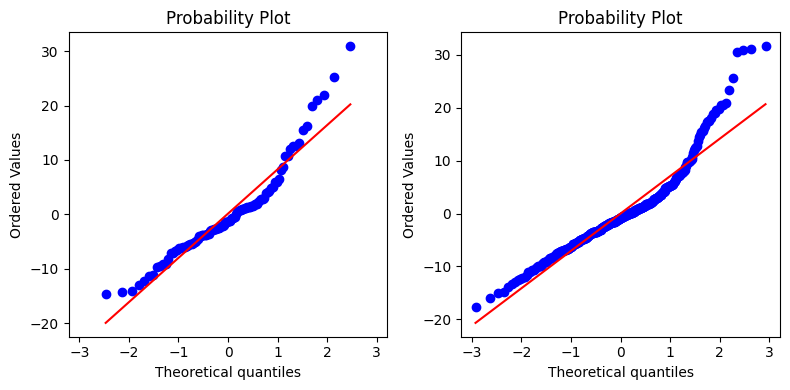

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=False) # , sharey=True
sample1 = diff_df.Error
sample2 = diff_df1.Error
stats.probplot(sample1, plot=ax[0]);
stats.probplot(sample2, plot=ax[1]);
fig.tight_layout();


<Axes: title={'center': 'Errors in y_pred'}, xlabel='Error', ylabel='Count'>

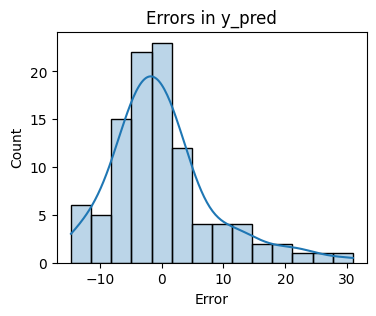

In [ ]:
import seaborn as sns
plt.figure(figsize=(4,3))
plt.title('Errors in y_pred', fontsize=12)
sns.histplot(diff_df['Error'], kde = True, alpha=0.3)



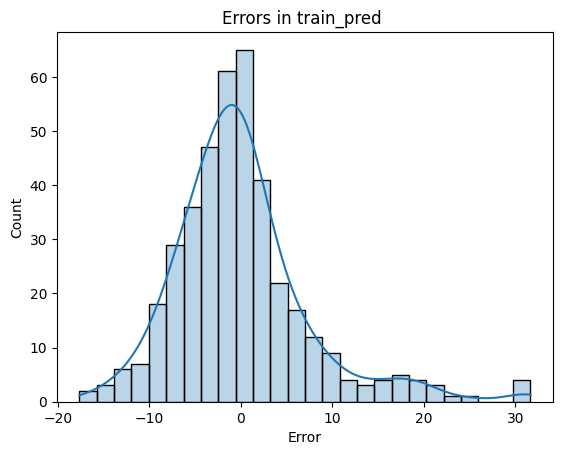

In [ ]:
plt.title('Errors in train_pred ', fontsize=12)
sns.histplot(diff_df1['Error'], kde = True, alpha=0.3);

In [ ]:
# Choose a simple model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the training and test datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model using MSE and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)


Training MSE: 54.03172449734598
Test MSE: 69.30391074832048
Training R^2: 0.3224197652900199
Test R^2: 0.324844619023259


### Avoiding underfitting:

In [ ]:
#Choosing features with high correlation with MEDV to train
correlation_matrix = data.corr()
correlation_threshold = 0.5
high_correlation_features = correlation_matrix[abs(correlation_matrix['MEDV']) > correlation_threshold].index.tolist()
data= data[high_correlation_features]

In [ ]:
X=data.drop(columns=['MEDV'])
y=data['MEDV']

In [ ]:
X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
model=LinearRegression()#building the model
model.fit(X_train,y_train)#training the model
train_pred=model.predict(X_train)
train_accuracy=r2_score(y_train,train_pred)
y_pred=model.predict(X_test)
test_accuracy=r2_score(y_test,y_pred)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)

Train accuracy:  0.6472951019137838
Test accuracy:  0.7637556307000093


Evaluating the model

In [ ]:
diff_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
diff_df['Error'] = diff_df['Actual Value'] - diff_df['Predicted Value']
diff_diff = diff_df.sort_values('Error').reset_index()
print(diff_df.head())
diff_df1= pd.DataFrame({'Actual Value': y_train, 'Predicted Value': train_pred})
diff_df1['Error'] = diff_df1['Actual Value'] - diff_df1['Predicted Value']
diff_diff1 = diff_df1.sort_values('Error').reset_index()
print(diff_df1.head())

     Actual Value  Predicted Value     Error
64           33.0        28.147271  4.852729
100          27.5        23.722891  3.777109
400           5.6        11.377973 -5.777973
485          21.2        22.159186 -0.959186
454          14.9        18.908351 -4.008351
     Actual Value  Predicted Value      Error
221          21.7        17.863526   3.836474
375          15.0        24.207386  -9.207386
450          13.4        19.737284  -6.337284
163          50.0        39.431152  10.568848
402          12.1        16.752828  -4.652828


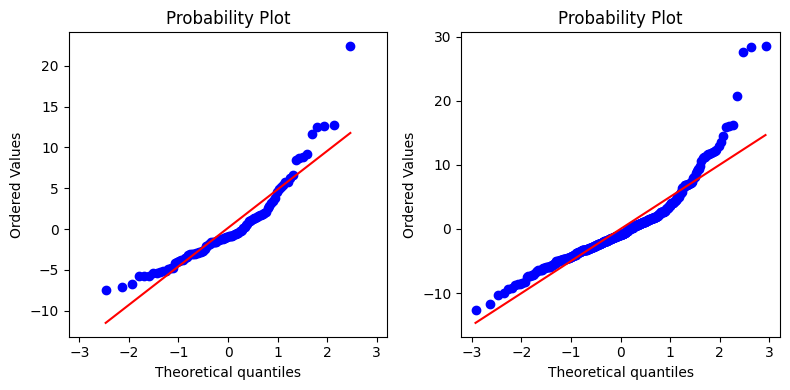

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=False) # , sharey=True
sample1 = diff_df.Error
sample2 = diff_df1.Error
stats.probplot(sample1, plot=ax[0]);
stats.probplot(sample2, plot=ax[1]);
fig.tight_layout();


Thus, we observe that the r2 score values have increased and are now closer to 1.